# Introduction to Correlation

In [13]:
import pandas as pd
import numpy as np

In [14]:
# fake kendall
k = pd.DataFrame()
k['X'] = np.arange(5)+1
k['Y'] = [7, 5, 1, 6, 9]

k

,X,Y
0,1,7
1,2,5
2,3,1
3,4,6
4,5,9


**Kendalls' τ** does not take into account the difference between ranks — only directional agreement. 
Therefore, this coefficient is more appropriate for **discrete data**.

![discrete data](../img/data-types.gif)

In [15]:
print(k.corr(method='kendall'))

     X    Y
X  1.0  0.2
Y  0.2  1.0


## Correlation in Pandas

In [16]:
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

mpg_data = pd.read_csv(path, delim_whitespace=True, header=None, 
                       names = ['mpg', 'cylinders', 'displacement','horsepower', 'weight', 'acceleration', 
                                'model_year', 'origin', 'name'], 
                       na_values='?')

In [17]:
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino


In [18]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 31.1+ KB


Pandas provides a convenient one-line method corr() for calculating correlation between data frame columns. 
In our fuel efficiency example, we can check whether heavier vehicles tend to have lower mpg (Miles Per Gallon) by passing the method to specific columns:

In [19]:
mpg_data['mpg'].corr(mpg_data['weight'])

-0.83174093324433507

As expected, there seems to be a strong negative correlation between vehicle **weight** and **mpg**.

what about horsepower or displacement?

In [20]:
mpg_data['horsepower'].corr(mpg_data['displacement'])

0.89725700184346868

Pandas can quickly calculate correlation between all columns in a dataframe. The user can also specify the correlation method: **Spearman**, **Pearson**, or **Kendall**

In [23]:
mpg_data.drop(['model_year', 'origin'], axis=1).corr(
    method='pearson')

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000


Finally, to visually inspect the relationship between mpg, weight, horsepower, and acceleration, we can plot these values and calculate Pearson and Spearman coefficients. The dataset at hand consists of less than 400 points, which can be easily displayed on a scatter plot. If you are dealing with much larger datasets, consider taking a sample of your data first to speed up the process and produce more readable plots.


In [25]:
%matplotlib inline
from matplotlib import pyplot as plt

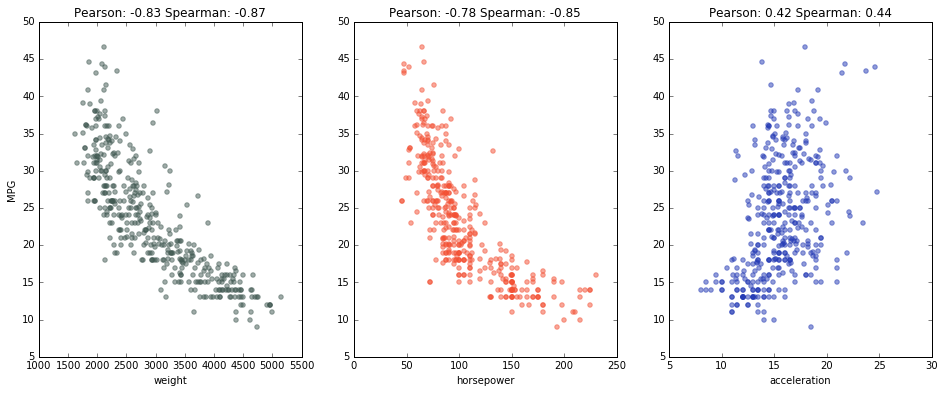

In [27]:
# plot correlated values
plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=3)

ax=ax.flatten()

cols = ['weight', 'horsepower', 'acceleration']
colors=['#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('MPG')
    i.scatter(mpg_data[cols[j]], mpg_data['mpg'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%mpg_data.corr().loc[cols[j]]['mpg'].round(2) 
                + ' Spearman: %s'%mpg_data.corr(method='spearman').loc[cols[j]]['mpg'].round(2))
    j+=1

plt.show()